In [1]:
# Import packages
import importlib
import os
import time
import numpy as np
import gc
import mosa
from paretoset import paretoset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

In [2]:
# -------------- PART 0a: CHOOSE CIRCUIT AND SET UP FOLDER --------------                            #<--------- SAME AS CODE1 UP TO...

# Choose circuit
circuit = input("Please enter name of the circuit: ")

# Import circuit config file
config = importlib.import_module(circuit)

# Define subfolder name to work in
folder_name = f"MOSA_{circuit}"

# Create folder if not yet exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Jump to folder
os.chdir(folder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")   

Current working directory: /Users/nt625/Documents/GitHub/My5thMOSArepository_plsdontcrash/TwoSpeciesCircuits/MOSA_posneg


In [3]:
# -------------- PART 0d: CHOOSE SENSITIVITY FUNCTIONS --------------

# Print prompt
print("""
We have the following sensitivity functions:
0. |S_betax_xss|
1. |S_betax_yss|
2. |S_betay_xss|
3. |S_betay_yss|
4. |S_n_xss|
5. |S_n_yss|
""")

# Choose pair of functions
choice1 = int(input("Please select first option number:"))
choice2 = int(input("Please select second option number:"))

# List of sensitivity function names
sensitivity_labels = [
    "|S_betax_xss|",
    "|S_betax_yss|",
    "|S_betay_xss|",
    "|S_betay_yss|",
    "|S_n_xss|",
    "|S_n_yss|"]

# Save function names for later use
label1 = sensitivity_labels[choice1]
label2 = sensitivity_labels[choice2]

# -------------- PART 0e: CHANGING DIRECTORIES --------------

# Define the subfolder name
subfolder_name = f"MOSA_sensfuncs_{choice1}_and_{choice2}/data"

# Jump to folder
os.chdir(subfolder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")


We have the following sensitivity functions:
0. |S_betax_xss|
1. |S_betax_yss|
2. |S_betay_xss|
3. |S_betay_yss|
4. |S_n_xss|
5. |S_n_yss|

Current working directory: /Users/nt625/Documents/GitHub/My5thMOSArepository_plsdontcrash/TwoSpeciesCircuits/MOSA_posneg/MOSA_sensfuncs_0_and_1/data


In [4]:
# -------------------- NEW STUFF --------------------

In [4]:
runs = int(input("How many MOSA runs did you run: "))
runs

10

In [5]:
# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto front
    pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{run}.npy", allow_pickle=True)
    pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))

    # There may be NaNs in the array. Pareto minimisation will think NaNs are minimum. We don't want this. Let's replace NaNs with infinities.
    pareto_front = np.where(np.isnan(pareto_front), np.inf, pareto_front)

    # Compute mask
    mask = paretoset(pareto_front, sense=["min", "min"])

    print(f"Run: {run}")
    if sum(mask) == len(pareto_sensfunc1):
        print("is good")

Run: 1
is good
Run: 2
is good
Run: 3
is good
Run: 4
is good
Run: 5
is good
Run: 6
is good
Run: 7
is good
Run: 8
is good
Run: 9
is good
Run: 10
is good


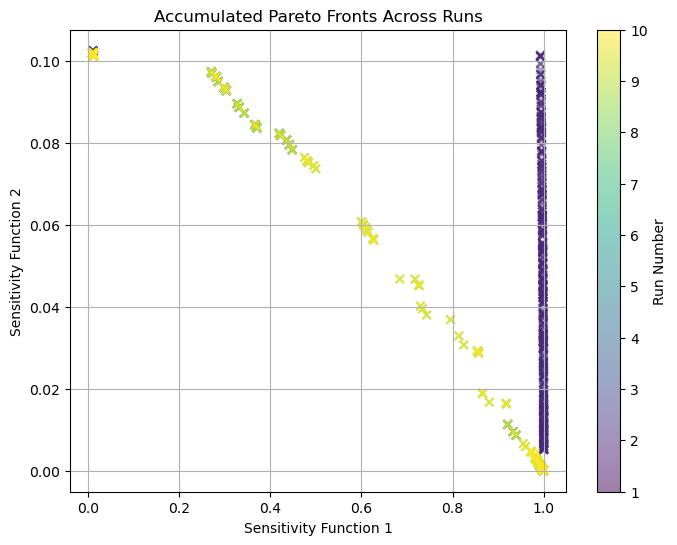

In [9]:
colors = []  # Color mapping for each run's data
all_filteredfront = np.empty((0, 2))  # Store all Pareto-optimal points
color_mapping = []  # Track corresponding run for each Pareto-optimal point

# Loop through runs
for run in range(1, runs + 1):

    AllParetoFrontsUpToCurrentRun = np.empty((0, 2))  # Initialize an empty array

    # Accumulate data from the first run up to the current run
    for i in range(1, run + 1):
        pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{i}.npy", allow_pickle=True)
        pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{i}.npy", allow_pickle=True)

        CurrentParetoFront = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))
        AllParetoFrontsUpToCurrentRun = np.vstack((AllParetoFrontsUpToCurrentRun, CurrentParetoFront))  # Fixed variable name

    # Multi-objective optimization (MOO) - Pareto front selection
    mask = paretoset(AllParetoFrontsUpToCurrentRun, sense=["min", "min"])
    filteredfront = AllParetoFrontsUpToCurrentRun[mask]

    # Store Pareto front points and corresponding colors
    all_filteredfront = np.vstack((all_filteredfront, filteredfront))
    color_mapping.extend([run] * len(filteredfront))  # Assign color based on Pareto-optimal points

# Plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(all_filteredfront[:, 0], all_filteredfront[:, 1], c=color_mapping, cmap="viridis", alpha=0.5, marker="x")

# Labels and legend
plt.xlabel("Sensitivity Function 1")
plt.ylabel("Sensitivity Function 2")
plt.title("Accumulated Pareto Fronts Across Runs")
cbar = plt.colorbar(sc)
cbar.set_label("Run Number")
plt.grid()

# Save figure
# plt.savefig("pareto_fronts.png", dpi=300)
plt.show()

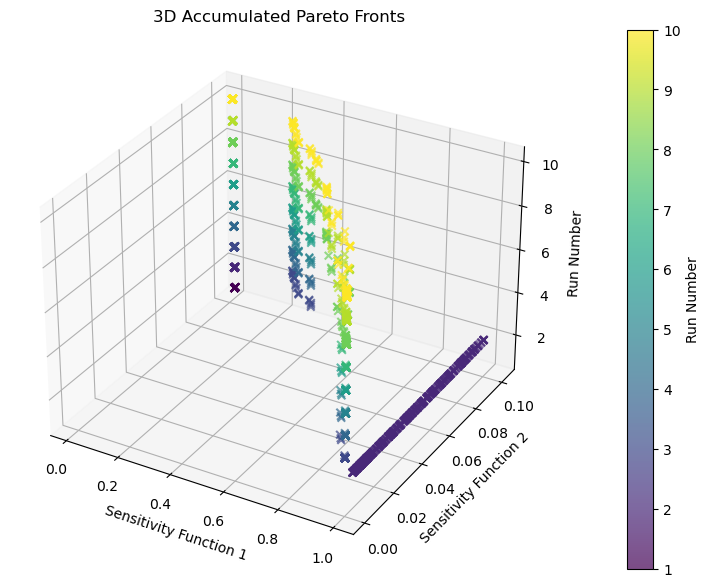

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from paretoset import paretoset

# Number of runs
runs = 10  # Change as needed

all_filteredfront = np.empty((0, 2))  # Store all Pareto-optimal points
color_mapping = []  # Store run number for coloring
z_values = []  # Store run number for Z-axis

# Loop through runs
for run in range(1, runs + 1):

    AllParetoFrontsUpToCurrentRun = np.empty((0, 2))  # Initialize an empty array

    # Accumulate data from the first run up to the current run
    for i in range(1, run + 1):
        pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{i}.npy", allow_pickle=True)
        pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{i}.npy", allow_pickle=True)

        CurrentParetoFront = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))
        AllParetoFrontsUpToCurrentRun = np.vstack((AllParetoFrontsUpToCurrentRun, CurrentParetoFront))

    # Compute Pareto-optimal points
    mask = paretoset(AllParetoFrontsUpToCurrentRun, sense=["min", "min"])
    filteredfront = AllParetoFrontsUpToCurrentRun[mask]

    # Store Pareto front points and corresponding run numbers
    all_filteredfront = np.vstack((all_filteredfront, filteredfront))
    color_mapping.extend([run] * len(filteredfront))  # Assign colors based on run number
    z_values.extend([run] * len(filteredfront))  # Store run number for Z-axis

# Convert to numpy arrays
all_filteredfront = np.array(all_filteredfront)
z_values = np.array(z_values)
color_mapping = np.array(color_mapping)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(all_filteredfront[:, 0], all_filteredfront[:, 1], z_values, 
                c=color_mapping, cmap="viridis", alpha=0.7, s=30, marker="x")

# Labels and title
ax.set_xlabel("Sensitivity Function 1")
ax.set_ylabel("Sensitivity Function 2")
ax.set_zlabel("Run Number")
ax.set_title("3D Accumulated Pareto Fronts")

# Color bar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Run Number")

# Show plot
plt.show()

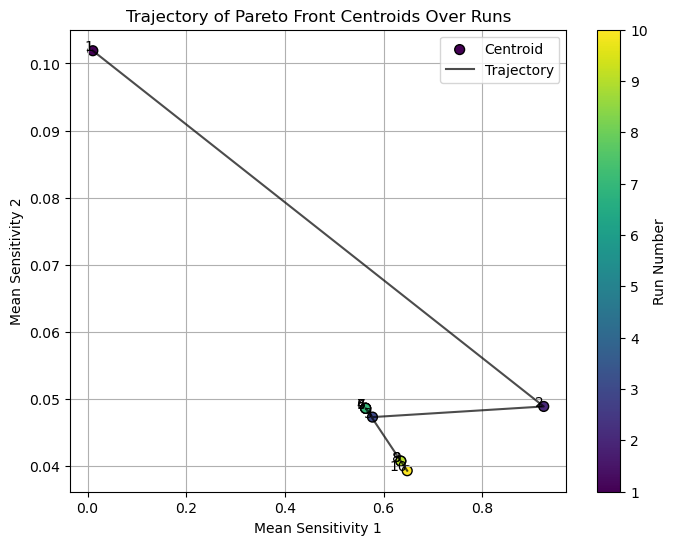

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from paretoset import paretoset

# Number of runs
runs = 10  # Change as needed

centroids_x = []  # Store mean x values
centroids_y = []  # Store mean y values

# Loop through runs
for run in range(1, runs + 1):

    AllParetoFrontsUpToCurrentRun = np.empty((0, 2))  # Initialize an empty array

    # Accumulate data from the first run up to the current run
    for i in range(1, run + 1):
        pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{i}.npy", allow_pickle=True)
        pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{i}.npy", allow_pickle=True)

        CurrentParetoFront = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))
        AllParetoFrontsUpToCurrentRun = np.vstack((AllParetoFrontsUpToCurrentRun, CurrentParetoFront))

    # Compute Pareto-optimal points
    mask = paretoset(AllParetoFrontsUpToCurrentRun, sense=["min", "min"])
    filteredfront = AllParetoFrontsUpToCurrentRun[mask]

    # Compute centroid (mean of Pareto-optimal points)
    centroid_x = np.mean(filteredfront[:, 0])
    centroid_y = np.mean(filteredfront[:, 1])

    # Store centroid values
    centroids_x.append(centroid_x)
    centroids_y.append(centroid_y)

# Convert to numpy arrays
centroids_x = np.array(centroids_x)
centroids_y = np.array(centroids_y)

# Create 2D trajectory plot
plt.figure(figsize=(8, 6))
plt.scatter(centroids_x, centroids_y, c=range(1, runs + 1), cmap="viridis", edgecolors="black", s=50, label="Centroid")
plt.plot(centroids_x, centroids_y, linestyle="-", color="black", alpha=0.7, label="Trajectory")

# Labels and title
plt.xlabel("Mean Sensitivity 1")
plt.ylabel("Mean Sensitivity 2")
plt.title("Trajectory of Pareto Front Centroids Over Runs")

# Color bar to indicate run number
cbar = plt.colorbar()
cbar.set_label("Run Number")

# Add run number labels at each point
for i in range(runs):
    plt.text(centroids_x[i], centroids_y[i], str(i + 1), fontsize=10, ha="right", color="black")

plt.legend()
plt.grid()

# Save and show
plt.savefig("pareto_centroid_trajectory.png", dpi=300)
plt.show()

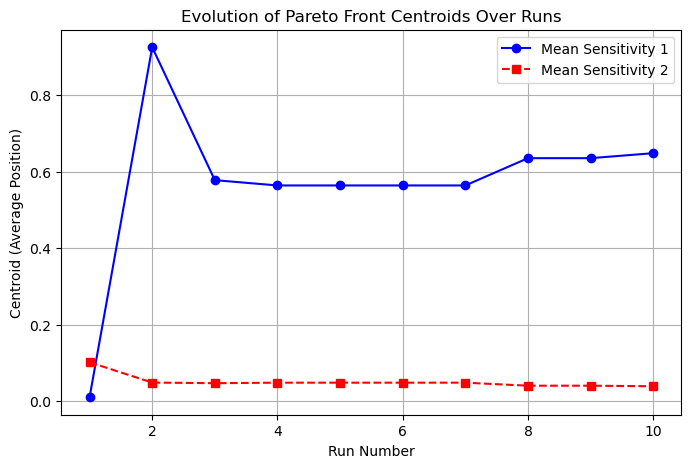

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from paretoset import paretoset

# Number of runs
runs = 10  # Change as needed

centroids_x = []  # Store mean x values
centroids_y = []  # Store mean y values

# Loop through runs
for run in range(1, runs + 1):

    AllParetoFrontsUpToCurrentRun = np.empty((0, 2))  # Initialize an empty array

    # Accumulate data from the first run up to the current run
    for i in range(1, run + 1):
        pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{i}.npy", allow_pickle=True)
        pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{i}.npy", allow_pickle=True)

        CurrentParetoFront = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))
        AllParetoFrontsUpToCurrentRun = np.vstack((AllParetoFrontsUpToCurrentRun, CurrentParetoFront))

    # Compute Pareto-optimal points
    mask = paretoset(AllParetoFrontsUpToCurrentRun, sense=["min", "min"])
    filteredfront = AllParetoFrontsUpToCurrentRun[mask]

    # Compute centroid (mean of Pareto-optimal points)
    centroid_x = np.mean(filteredfront[:, 0])
    centroid_y = np.mean(filteredfront[:, 1])

    # Store centroid values
    centroids_x.append(centroid_x)
    centroids_y.append(centroid_y)

# Plot Centroid X and Y over Runs
plt.figure(figsize=(8, 5))
plt.plot(range(1, runs + 1), centroids_x, marker="o", linestyle="-", color="blue", label="Mean Sensitivity 1")
plt.plot(range(1, runs + 1), centroids_y, marker="s", linestyle="--", color="red", label="Mean Sensitivity 2")

# Labels and legend
plt.xlabel("Run Number")
plt.ylabel("Centroid (Average Position)")
plt.title("Evolution of Pareto Front Centroids Over Runs")
plt.legend()
plt.grid()

# Save and show
plt.savefig("pareto_centroids.png", dpi=300)
plt.show()

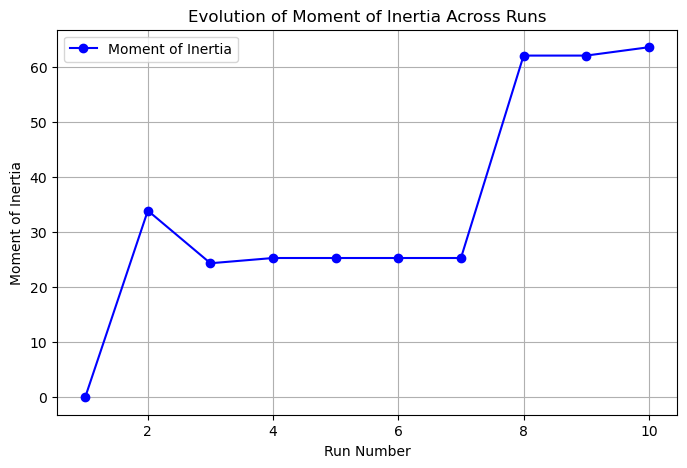

In [ ]:
moments_of_inertia = []  # Store moment of inertia for each run

# Loop through runs
for run in range(1, runs + 1):

    AllParetoFrontsUpToCurrentRun = np.empty((0, 2))  # Initialize an empty array

    # Accumulate data from the first run up to the current run
    for i in range(1, run + 1):
        pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{i}.npy", allow_pickle=True)
        pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{i}.npy", allow_pickle=True)

        CurrentParetoFront = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))
        AllParetoFrontsUpToCurrentRun = np.vstack((AllParetoFrontsUpToCurrentRun, CurrentParetoFront))

    # Compute Pareto-optimal points
    mask = paretoset(AllParetoFrontsUpToCurrentRun, sense=["min", "min"])
    filteredfront = AllParetoFrontsUpToCurrentRun[mask]

    # Compute centroid
    centroid_x = np.mean(filteredfront[:, 0])
    centroid_y = np.mean(filteredfront[:, 1])

    # Compute moment of inertia (sum of squared distances from centroid)
    distances_sq = (filteredfront[:, 0] - centroid_x) ** 2 + (filteredfront[:, 1] - centroid_y) ** 2
    moment_of_inertia = np.sum(distances_sq)

    # Store moment of inertia
    moments_of_inertia.append(moment_of_inertia)

# Plot Moment of Inertia over Runs
plt.figure(figsize=(8, 5))
plt.plot(range(1, runs + 1), moments_of_inertia, marker="o", linestyle="-", color="blue", label="Moment of Inertia")
plt.xlabel("Run Number")
plt.ylabel("Moment of Inertia")
plt.title("Evolution of Moment of Inertia Across Runs")
plt.legend()
plt.grid()

# Save and show
plt.savefig("moment_of_inertia.png", dpi=300)
plt.show()

In [ ]:
just plot runs that have big jump onto 2D sensitivity space

In [9]:
# Get pareto front of this collection of pareto fronts

mask2 = paretoset(total_paretofront, sense=["min", "min"])
filtered_total_paretofront = total_paretofront[mask2]
np.shape(filtered_total_paretofront)

(167, 2)

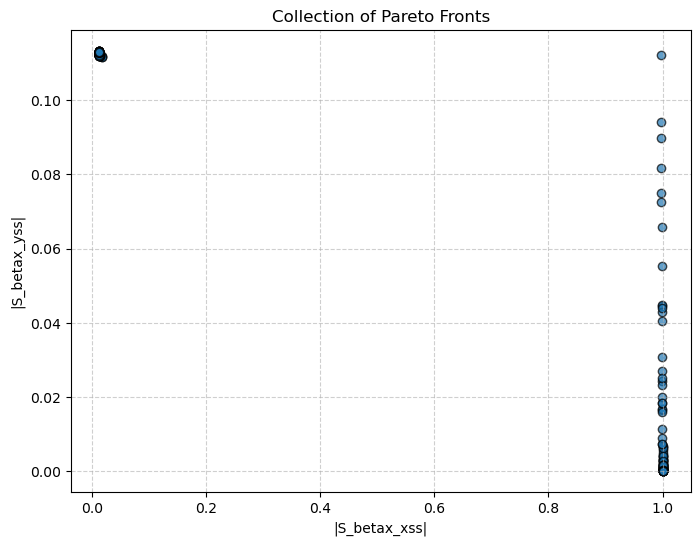

In [16]:
# Plot all pareto points from each run

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(total_paretofront[:, 0], total_paretofront[:, 1], alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel(label1)
plt.ylabel(label2)
plt.title("Collection of Pareto Fronts")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

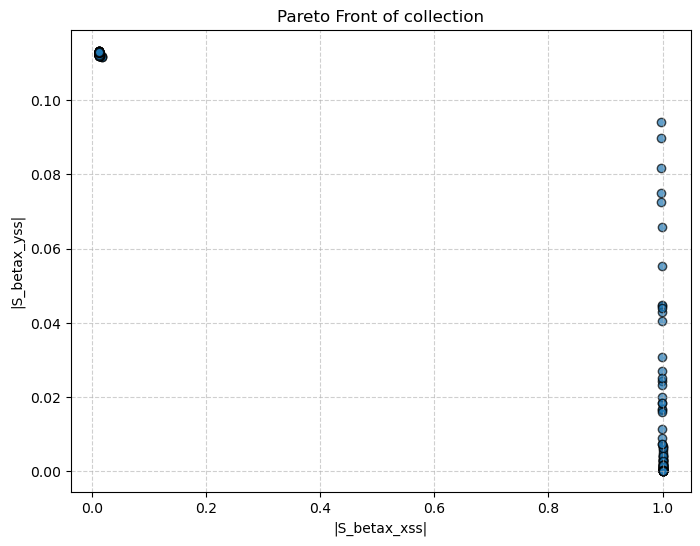

In [ ]:
# Plot pareto front of the collection of all separate pareto fronts

# Extract columns
x_maxruns = filtered_total_paretofront[:, 0]  # First column
y_maxruns = filtered_total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_maxruns[:, 0], y_maxruns[:, 1], alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel(label1)
plt.ylabel(label2)
plt.title("Pareto Front of collection")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

In [ ]:
# Get corresponding parameters

# Initialize an empty array for storing Pareto parameters
total_paretoparams = np.empty((0, 3))

# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto parameters
    pareto_betax = np.load(f"pareto_betax_run{run}.npy", allow_pickle=True)
    pareto_betay = np.load(f"pareto_betay_run{run}.npy", allow_pickle=True)
    pareto_n = np.load(f"pareto_n_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_params = np.column_stack((pareto_betax, pareto_betay, pareto_n))

    # Append to the total Pareto front
    total_paretoparams = np.vstack((total_paretoparams, pareto_params))

# Now, total_paretoparams contains all runs stacked together
np.shape(total_paretoparams)

(168, 3)

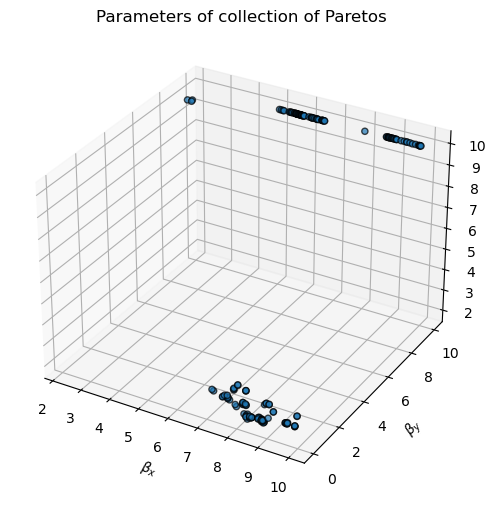

In [13]:
# Plot parameters corresponding to collection of Pareto fronts

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # 3D subplot

# Scatter plot with 3D points
ax.scatter(total_paretoparams[:, 0], total_paretoparams[:, 1], total_paretoparams[:, 2], alpha=0.7, edgecolors='k')

# Labels and title
ax.set_xlabel(r"$\beta_x$")
ax.set_ylabel(r"$\beta_y$")
ax.set_zlabel(r"$n$")
ax.set_title("Parameters of collection of Paretos")

# Show grid for better visualization
ax.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

In [14]:
# Apply mask to get filtered parameters
filtered_total_paretoparams = total_paretoparams[mask2]
np.shape(filtered_total_paretoparams)

(167, 3)

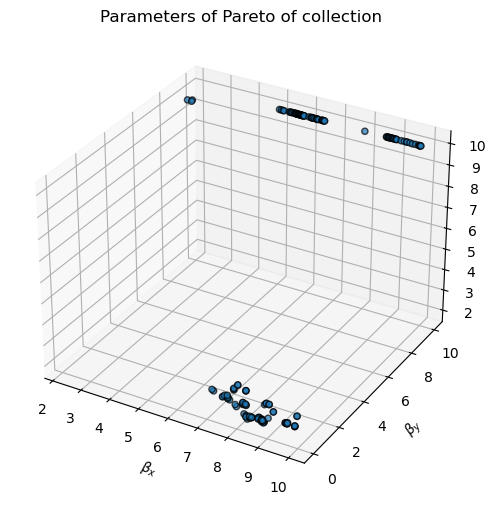

In [15]:
# Plot parameters corresponding to Pareto front of collection of fronts

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # 3D subplot

# Scatter plot with 3D points
ax.scatter(filtered_total_paretoparams[:, 0], filtered_total_paretoparams[:, 1], filtered_total_paretoparams[:, 2], alpha=0.7, edgecolors='k')

# Labels and title
ax.set_xlabel(r"$\beta_x$")
ax.set_ylabel(r"$\beta_y$")
ax.set_zlabel(r"$n$")
ax.set_title("Parameters of Pareto of collection")

# Show grid for better visualization
ax.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()